# Digital Image Processing Lab

### MTH Junaidi, AP17110010074, CSE B

### Lab 05 : Histogram Specification or Matching

### Question

Take a low contrast gray scale image (A) and a high contrast gray scale image (B).

Write a program to improve the contrast of A with the help of image B using histogram specification or matching.

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [26]:
low_lena = mpimg.imread("low_lena.png")

In [27]:
high_lena = mpimg.imread("high_contrast_lena.png")

In [28]:
low_lena = np.array(low_lena)

In [29]:
high_lena = np.array(high_lena)

In [34]:
low_lena.shape

(255, 255, 4)

In [36]:
temp1 =[]
temp2 = []
for i in range(255):
    for j in range(255):
        temp2.append(sum(low_lena[i][j])/4)
    temp1.append(temp2)
    temp2 =[]

In [37]:
low_lena = np.array(temp1)

In [47]:
high_lena.shape

(255, 255)

In [48]:
low_lena.shape

(255, 255)

In [56]:
high_lena.min()

0.0

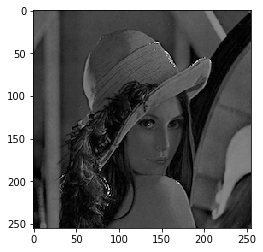

In [38]:
plt.imshow(low_lena, cmap='gray')

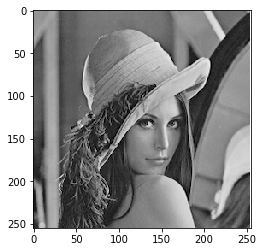

In [39]:
plt.imshow(high_lena, cmap='gray')

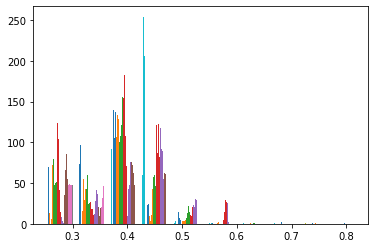

In [40]:
plt.hist(low_lena)
plt.show()

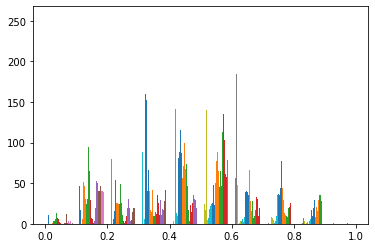

In [41]:
plt.hist(high_lena)
plt.show()

In [42]:
low_lena = low_lena * 255

In [43]:
high_lena = high_lena * 255

In [67]:
def equalised_mappping(image):
    frequency = []
    for i in range(26):
        frequency.append(0)
    for i in range (len(image)):
        for j in range(len(image[1])):
            temp = int(image[i][j]//10)
            frequency[temp] += 1
    frequency = np.array(frequency)
    probability = frequency/(255*255)
    cp = [0]
    for i in range (1,25):
        cp.append(cp[i-1] + probability[i])
    return cp

In [69]:
cp_low_lena= equalised_mappping(low_lena)

In [75]:
cp_low_lena

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10617454825067282,
 0.1936485966935794,
 0.2823529411764706,
 0.49539407920030754,
 0.7389773164167628,
 0.9076355247981546,
 0.9596924259900038,
 0.9960938100730488,
 0.9985390234525182,
 0.9990465205690119,
 0.9994309880815071,
 0.999600153787005,
 0.9998615916955017,
 0.9999538638985006,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [74]:
cp_high_lena

[0,
 0.002429834678969627,
 0.012364475201845445,
 0.06179161860822761,
 0.12805843906189926,
 0.16639753940792001,
 0.2009996155324875,
 0.2374163783160323,
 0.29654748173779316,
 0.36172241445597847,
 0.41416378316032293,
 0.49119569396386004,
 0.5651518646674356,
 0.6462129950019223,
 0.7333487120338331,
 0.800953479430988,
 0.8441214917339485,
 0.876078431372549,
 0.9007304882737409,
 0.9327950788158401,
 0.966566705113418,
 0.9843752402921954,
 0.988327566320646,
 0.9889119569396387,
 0.9889119569396387]

In [80]:
low_inten = np.array(cp_low_lena) * 255

In [81]:
low_inten

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  27.0745098 ,  49.38039216,
        72.        , 126.3254902 , 188.43921569, 231.44705882,
       244.72156863, 254.00392157, 254.62745098, 254.75686275,
       254.85490196, 254.89803922, 254.96470588, 254.98823529,
       255.        , 255.        , 255.        , 255.        ,
       255.        ])

In [82]:
high_inten = np.array(cp_high_lena) * 255

In [83]:
high_inten

array([  0.        ,   0.61960784,   3.15294118,  15.75686275,
        32.65490196,  42.43137255,  51.25490196,  60.54117647,
        75.61960784,  92.23921569, 105.61176471, 125.25490196,
       144.11372549, 164.78431373, 187.00392157, 204.24313725,
       215.25098039, 223.4       , 229.68627451, 237.8627451 ,
       246.4745098 , 251.01568627, 252.02352941, 252.17254902,
       252.17254902])

In [78]:
def nearest_value(value, given_list):
    absolute_difference_function = lambda list_value : abs(list_value - value)
    closest_value = min(given_list, key=absolute_difference_function)
    return closest_value

In [85]:
nearest_value(high_inten[3], low_inten)

27.07450980392157

In [87]:
low_inten = list(low_inten)

In [88]:
low_inten.index(27.07450980392157)

6

In [90]:
final_inten = []
for i in range(25):
    final_inten.append(low_inten.index(nearest_value(high_inten[i], low_inten)))

In [91]:
final_inten

[0,
 0,
 0,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 13]

In [92]:
final_inten = np.array(final_inten)*10

In [93]:
image = low_lena

In [94]:
temp1 =[]
temp2 = []
for i in range(len(image)):
    for j in range(len(image[1])):
        temp = final_inten[int(image[i][j]//10)]
        temp2.append(temp)
    temp1.append(temp2)
    temp2 =[]

In [95]:
final_image = np.array(temp1)

In [103]:
final_image.max()

120

In [105]:
final_image.min()

70

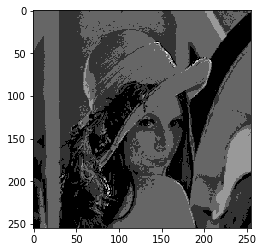

In [109]:
plt.imshow(final_image, cmap='gray')

## Above is the histogram specified or matching Image